In [4]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=7795e0b02d21a619f6937a7f4789679a6dd47e7edc580c21cf928a01c5db61b1
  Stored in directory: c:\users\jinny\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=57475a4f918f28f9912d8bdadfe52efeec6f5cbc3cb1e38ab5773e6effcaacdc
  Stored in directory: c:\users\jinny\appdata\local\pip\cache\wheels\cc\af\1a\498a24d0730ef484019e007bb9e8cef3ac00311a672c049a3e
Successfully built termcolor absl-py
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras-models

  Using cached blis-0.4.1-cp37-cp37m-win_amd64.whl (5.0 MB)
  Using cached cymem-2.0.3-cp37-cp37m-win_amd64.whl (32 kB)
  Using cached wasabi-0.6.0-py3-none-any.whl (20 kB)
  Using cached murmurhash-1.0.2-cp37-cp37m-win_amd64.whl (20 kB)
  Using cached srsly-1.0.2-cp37-cp37m-win_amd64.whl (179 kB)
  Using cached preshed-3.0.2-cp37-cp37m-win_amd64.whl (105 kB)
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14353 sha256=5357213de55731f5c973bcdc868330fcaab5caaa8996041998b4d4e03f20c0c7
  Stored in directory: c:\users\jinny\appdata\local\pip\cache\wheels\6e\96\b8\10037fe231e23970bac58361d7c93571ab983a7bbc55e68550
Successfully built pathlib
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install dataset

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for alembic: filename=alembic-1.4.2-py2.py3-none-any.whl size=159547 sha256=2c66790779a0bbde4dd183afcf0ed0c87de824f53d76b60e35d485a6c159c7bf
  Stored in directory: c:\users\jinny\appdata\local\pip\cache\wheels\4e\b5\00\f93fe1c90b3d501774e91e2e99987f49d16019e40e4bd3afc3
Successfully built alembic
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [75]:
data= pd.read_csv('price.csv')
data

,DATE,Open,High,Low,Close,Volume,MarketCap
0,2019-12-31,7294.44,7335.29,7169.78,7193.60,21167946112,1.304460e+11
1,2019-12-30,7420.27,7454.82,7276.31,7293.00,22874131672,1.322350e+11
2,2019-12-29,7317.65,7513.95,7279.87,7422.65,22445257702,1.345710e+11
3,2019-12-28,7289.03,7399.04,7286.91,7317.99,21365673026,1.326590e+11
4,2019-12-27,7238.14,7363.53,7189.93,7290.09,22777360996,1.321400e+11
...,...,...,...,...,...,...,...
1731,2015-04-05,253.76,260.67,251.94,260.60,19649200,3.654268e+09
1732,2015-04-04,254.29,255.26,251.10,253.70,12493500,3.556559e+09
1733,2015-04-03,253.07,256.04,251.88,254.32,23146600,3.564355e+09
1734,2015-04-02,247.09,254.46,245.42,253.01,26272600,3.544973e+09


In [76]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [77]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [78]:
def normalize_windows(data):
    normalized_data = []
    for window in data:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
    return np.array(normalized_data)

result = normalize_windows(result)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1516, 50, 1), (169, 50, 1))

In [79]:

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [80]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20,
    callbacks=[
        TensorBoard(log_dir='logs/%s' % (start_time)),
        ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')
])

Train on 1516 samples, validate on 169 samples
Epoch 1/20
  50/1516 [..............................] - ETA: 37s - loss: 0.0582

C:\Users\jinny\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.171043). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1516/1516 [==============================] - 7s 5ms/step - loss: 0.0093 - val_loss: 0.0017

Epoch 00001: val_loss improved from inf to 0.00174, saving model to ./models/2020_05_24_19_46_29_eth.h5


OSError: Unable to create file (unable to open file: name = './models/2020_05_24_19_46_29_eth.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

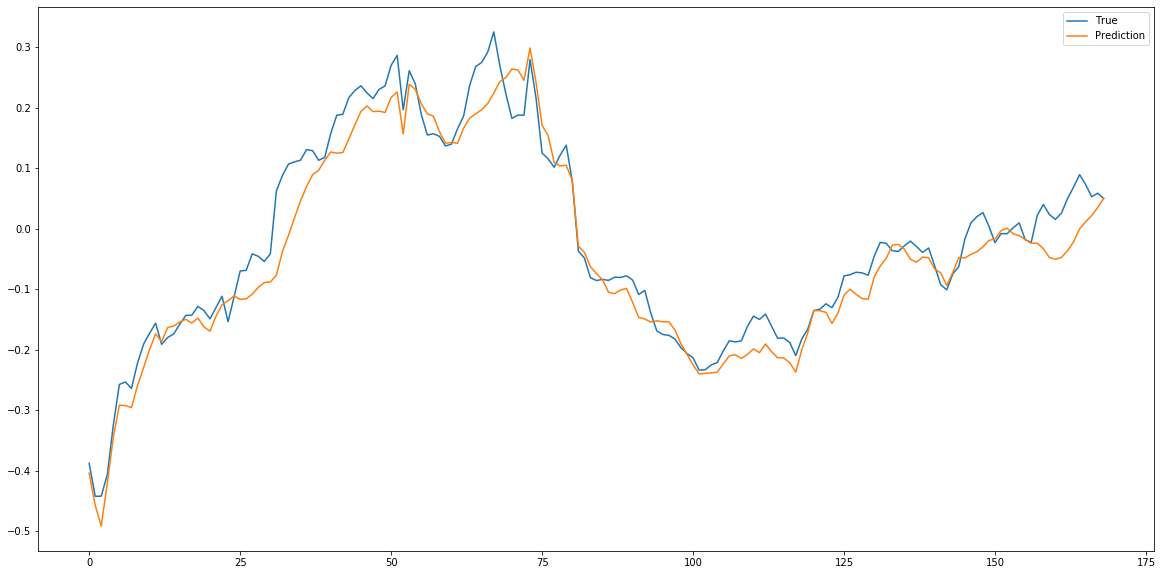

In [81]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()